# Assignment 1

## Raksha Pahariya | 2021CSB029

#Read the dataset in the Pandas data frame. Estimate the missing values with any technique of your choice.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Assign_1/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Get a summary of the dataset
print(train_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Describe numerical features
print(train_df.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
# Check for missing values
print(train_df.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Explore categorical features
#it will basically show the output of count of each values
for col in train_df.select_dtypes(include='object'):
    print(f"Values for {col}:")
    print(train_df[col].value_counts())
    print("\n")

Values for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Values for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Values for Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Values for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Values for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Values for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Values for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Values for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Values for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes    

<Axes: xlabel='SalePrice'>

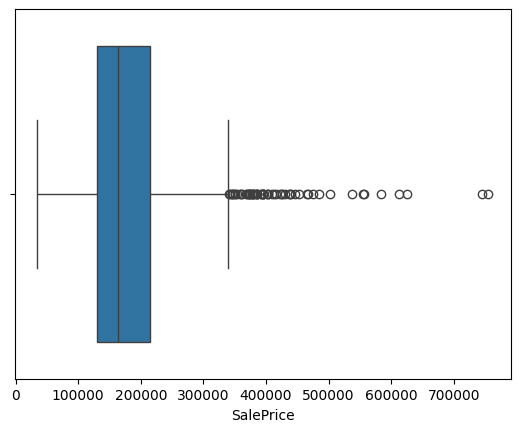

In [8]:

sns.boxplot(x=train_df['SalePrice'])

In [9]:
from scipy import stats

# Calculate z-scores for 'SalePrice'
train_df['z_score'] = stats.zscore(train_df['SalePrice'])

# Define z-score threshold for outliers (e.g., 2)
threshold = 2.5

# Remove outliers from the entire DataFrame
train_df = train_df[abs(train_df['z_score']) < threshold]

# Remove the 'z_score' column
train_df = train_df.drop('z_score', axis=1)

##NOT REFILLING??

<Axes: xlabel='SalePrice'>

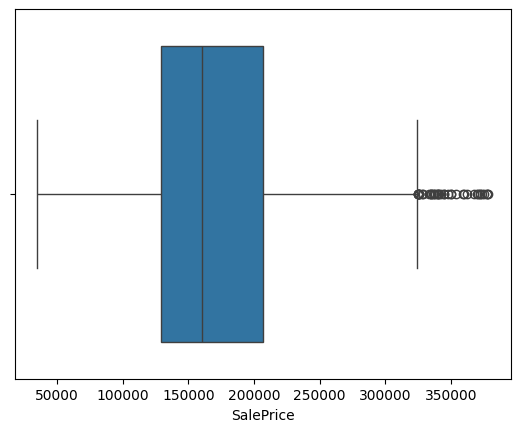

In [10]:
sns.boxplot(x=train_df['SalePrice'])

<Axes: xlabel='LotArea'>

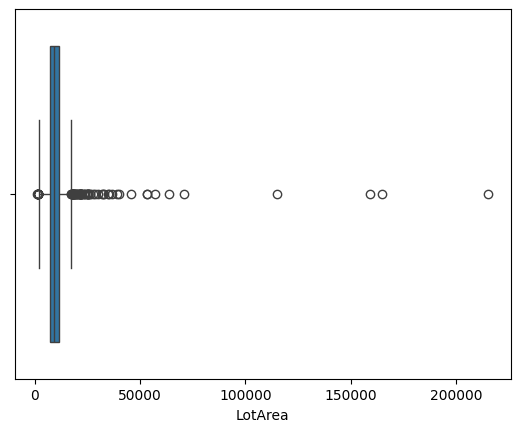

In [11]:
import seaborn as sns
sns.boxplot(x=train_df['LotArea'])

In [12]:

# Calculate z-scores
train_df['z_score'] = stats.zscore(train_df['LotArea'])

# Define z-score threshold for outliers (e.g., 2)
threshold = 2

# Remove outliers from the entire DataFrame
train_df = train_df[abs(train_df['z_score']) < threshold]

# Remove the 'z_score' column
train_df = train_df.drop('z_score', axis=1)

<Axes: xlabel='LotArea'>

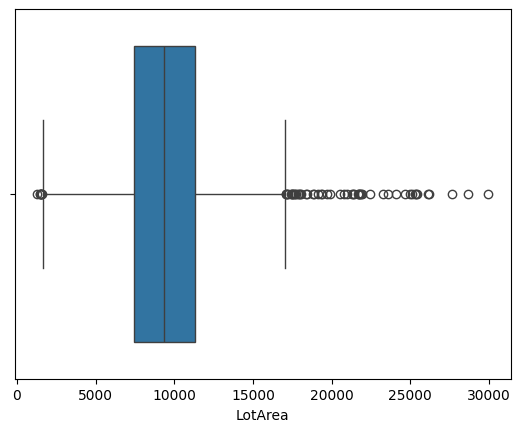

In [13]:
sns.boxplot(x=train_df['LotArea'])

In [14]:
from sklearn.impute import SimpleImputer

# Impute missing numerical values with the mean
imputer_num = SimpleImputer(strategy='mean')
train_df[train_df.select_dtypes(include=np.number).columns] = imputer_num.fit_transform(train_df.select_dtypes(include=np.number))

# Impute missing categorical values with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
train_df[train_df.select_dtypes(exclude=np.number).columns] = imputer_cat.fit_transform(train_df.select_dtypes(exclude=np.number))

In [15]:
from sklearn.preprocessing import MinMaxScaler
## Normalizing the data here

# Select numerical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


#Divide the dataset into two sets using stratified k-fold cross validation technique entitled to train and test set respectively.

In [16]:
def train(X, y, kf):
  model = LinearRegression()
  # Iterate over folds and create train/test splits
  fold = 0;
  for train_index, test_index in kf.split(X):
      fold += 1
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      # Train the model on the current fold
      model.fit(X_train, y_train)

      # Predict on training and test sets
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)

      # Calculate metrics for the current fold
      mse_train = mean_squared_error(y_train, y_train_pred)
      mse_test = mean_squared_error(y_test, y_test_pred)
      r2_train = r2_score(y_train, y_train_pred)
      r2_test = r2_score(y_test, y_test_pred)

      print(f"Fold Metrics: {fold}")
      print("  Train MSE:", mse_train)
      print("  Test MSE:", mse_test)
      print("  Train R2:", r2_train)
      print("  Test R2:", r2_test)

  return model

#Use the linear regression method to estimate the slope and intercept for predicting “SalePrice” based on “LotArea”.

In [17]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = train_df[['LotArea']]
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5)

model = train(X, y, kf)

# Predict on the training data
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

Fold Metrics: 1
  Train MSE: 0.029782916242871722
  Test MSE: 0.02655170421148009
  Train R2: 0.125650402382383
  Test R2: 0.15983338362282684
Fold Metrics: 2
  Train MSE: 0.027965628453916345
  Test MSE: 0.033784681570047576
  Train R2: 0.13163212800502933
  Test R2: 0.13408297856648022
Fold Metrics: 3
  Train MSE: 0.02854715871223959
  Test MSE: 0.03149426586344456
  Train R2: 0.14362887919481337
  Test R2: 0.08705741753192986
Fold Metrics: 4
  Train MSE: 0.02968824914238445
  Test MSE: 0.02700436980073636
  Train R2: 0.13863614787224543
  Test R2: 0.09361567433026474
Fold Metrics: 5
  Train MSE: 0.02961480513352729
  Test MSE: 0.027186551104038365
  Train R2: 0.12314062580132135
  Test R2: 0.16964256890405294
MSE: 0.03344569854380856
R2 Score: 0.09380052325332366


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


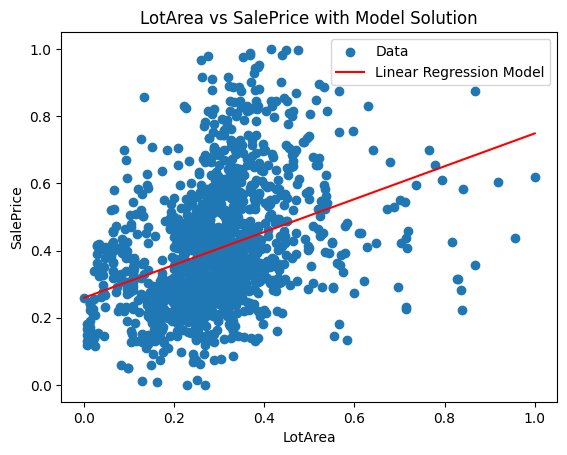

In [18]:
# Generate predictions for visualization
x_range = np.linspace(X.min(), X.max(), 10000)
y_pred = model.predict(x_range.reshape(-1, 1))

# Plot the data and model solution
plt.scatter(X, y, label='Data')
plt.plot(x_range, y_pred, color='red', label='Linear Regression Model')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice with Model Solution')
plt.legend()
plt.show()

#Use the multiple regression method to estimate the value of the weights/coefficients for predicting “SalePrice” based on the following features:
- a. Model 1: LotFrontage, LotArea
- b. Model 2: LotFrontage, LotArea, OverallQual, OverallCond
- c. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF,
GrLivArea

In [19]:
#function for residual plot
def residual_plot(X_test, y_test, model):
  y_pred = model.predict(X_test)
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals)
  plt.xlabel('Fitted Values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs. Fitted Values')
  plt.axhline(y=0, color='red', linestyle='--')
  plt.show()

Fold Metrics: 1
  Train MSE: 0.02850482090287645
  Test MSE: 0.023553356145722
  Train R2: 0.14897664945222444
  Test R2: 0.2058771472832981
Fold Metrics: 2
  Train MSE: 0.027644543579456837
  Test MSE: 0.026940732068928497
  Train R2: 0.1626497180033043
  Test R2: 0.14719688231675476
Fold Metrics: 3
  Train MSE: 0.02754336467615693
  Test MSE: 0.027609570442273336
  Train R2: 0.17056995547729603
  Test R2: 0.10300080893410679
Fold Metrics: 4
  Train MSE: 0.026625611832490233
  Test MSE: 0.031080787562456663
  Train R2: 0.1624291063340506
  Test R2: 0.13396426439277842
Fold Metrics: 5
  Train MSE: 0.0270397244993244
  Test MSE: 0.0293853109922682
  Train R2: 0.15814149320506843
  Test R2: 0.15963535037498155
Model 1 Coefficients: [0.37630568 0.3774175 ]
Model 1 test MSE: 0.032352813343110506
Model 1 test R2 Score: 0.1234118646256539


Residual Plot for Model 1




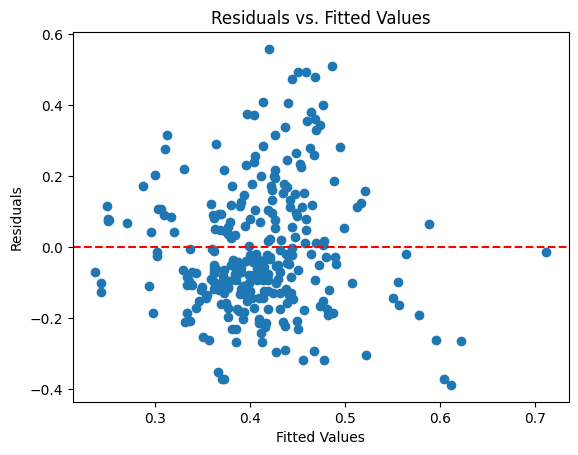

Fold Metrics: 1
  Train MSE: 0.009695828424117233
  Test MSE: 0.008380144406190818
  Train R2: 0.7105269869983308
  Test R2: 0.7174557994686932
Fold Metrics: 2
  Train MSE: 0.009857339627168392
  Test MSE: 0.007674996874019937
  Train R2: 0.7014222321007901
  Test R2: 0.7570496137362875
Fold Metrics: 3
  Train MSE: 0.009199720137013593
  Test MSE: 0.010412256940536605
  Train R2: 0.722963248224898
  Test R2: 0.6617192551995915
Fold Metrics: 4
  Train MSE: 0.00923749662809518
  Test MSE: 0.010222413751452183
  Train R2: 0.7094129383878183
  Test R2: 0.7151624425497498
Fold Metrics: 5
  Train MSE: 0.009043999493291597
  Test MSE: 0.011030504425876065
  Train R2: 0.7184228741285136
  Test R2: 0.6845483109068484
Model 2 Coefficients: [0.107533   0.3154546  0.95156553 0.00928763]
Model 2 MSE: 0.010677408511070954
Model 2 R2 Score: 0.7106993596480229


Residual Plot for Model 2




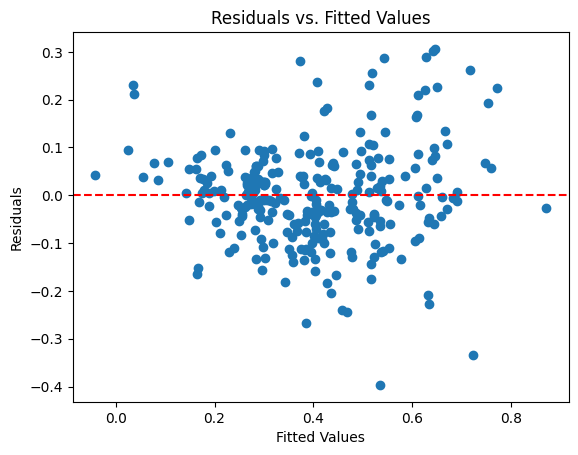

Fold Metrics: 1
  Train MSE: 0.00739771203155108
  Test MSE: 0.006740523214600539
  Train R2: 0.7791382131138773
  Test R2: 0.7727371211616496
Fold Metrics: 2
  Train MSE: 0.007551297377920783
  Test MSE: 0.006073272255689045
  Train R2: 0.7712720063303315
  Test R2: 0.8077518643168493
Fold Metrics: 3
  Train MSE: 0.007242434603880211
  Test MSE: 0.007420308986701562
  Train R2: 0.781904174505259
  Test R2: 0.7589237698410845
Fold Metrics: 4
  Train MSE: 0.007227273133679288
  Test MSE: 0.007459560296768082
  Train R2: 0.7726492200281765
  Test R2: 0.7921466508550936
Fold Metrics: 5
  Train MSE: 0.006754829371515994
  Test MSE: 0.009355619719357762
  Train R2: 0.7896942119916539
  Test R2: 0.732446864708981
Model 3 Coefficients: [0.03735815 0.14892386 0.72663614 0.03530412 0.23164276 0.31366447]
Model 3 MSE: 0.007343143543828283
Model 3 R2 Score: 0.8010401000183394


Residual Plot for Model 3




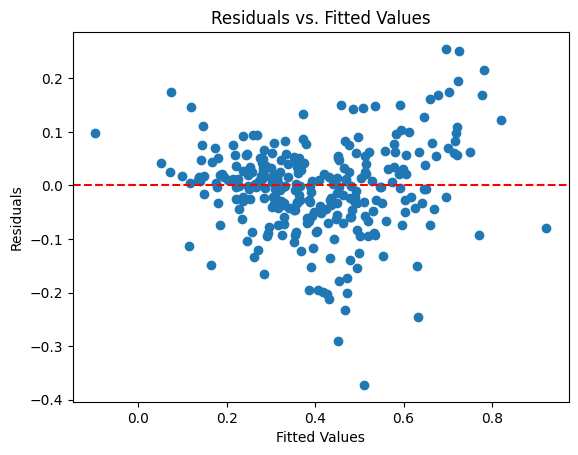

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_scores = []

#############################################################################################################

# Model 1
features1 = ['LotFrontage', 'LotArea']
X1 = train_df[features1]
y = train_df['SalePrice']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model1 = train(X_train1, y_train, kf)
print("Model 1 Coefficients:", model1.coef_)

# Predict on test set
y_pred1 = model1.predict(X_test1)

# Calculate test MSE and R2 score
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 test MSE:", mse1)
print("Model 1 test R2 Score:", r2_1)

model_scores.append({'Model': "model1", 'MSE': mse1, 'R2 Score': r2_1})

#residual plot
print("\n\nResidual Plot for Model 1\n\n")
residual_plot(X_test1, y_test, model1)


#############################################################################################################

# Model 2
features2 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
X2 = train_df[features2]
X_train2, X_test2, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model2 = train(X_train2, y_train, kf)
print("Model 2 Coefficients:", model2.coef_)

# Predict on test set
y_pred2 = model2.predict(X_test2)

# Calculate MSE and R2 score
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2 MSE:", mse2)
print("Model 2 R2 Score:", r2_2)

model_scores.append({'Model': "model2", 'MSE': mse2, 'R2 Score': r2_2})

#residual plot
print("\n\nResidual Plot for Model 2\n\n")
residual_plot(X_test2, y_test, model2)


#############################################################################################################

# Model 3
features3 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
X3 = train_df[features3]
X_train3, X_test3, _, _ = train_test_split(X3, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model3 = train(X_train3, y_train, kf)
print("Model 3 Coefficients:", model3.coef_)

# Predict on test set
y_pred3 = model3.predict(X_test3)

# Calculate MSE and R2 score
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 MSE:", mse3)
print("Model 3 R2 Score:", r2_3)

model_scores.append({'Model': "model3", 'MSE': mse3, 'R2 Score': r2_3})

#residual plot
print("\n\nResidual Plot for Model 3\n\n")
residual_plot(X_test3, y_test, model3)



##Compare the Mean Squared Error, R2 score for each of the model using the training set and test set


In [21]:
df_scores = pd.DataFrame(model_scores)

# Print the table
print("MSE and R2 score for test data")
print(df_scores)

MSE and R2 score for test data
    Model       MSE  R2 Score
0  model1  0.032353  0.123412
1  model2  0.010677  0.710699
2  model3  0.007343  0.801040


##Use the multiple regression method to estimate the value of the weights/coefficients for predicting “SalePrice” based on the following set of mixed (numerical and categorical) features:
- a. Model 4: LotArea, Street
- b. Model 5: LotArea, OverallCond, Street, Neighborhood
- c. Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

Fold Metrics: 1
  Train MSE: 0.0285896090867326
  Test MSE: 0.02465565951749944
  Train R2: 0.14644526275949699
  Test R2: 0.16871198522574005
Fold Metrics: 2
  Train MSE: 0.02779173260795279
  Test MSE: 0.027875741389473345
  Train R2: 0.1581913779998364
  Test R2: 0.11759936204212285
Fold Metrics: 3
  Train MSE: 0.028068153363063765
  Test MSE: 0.026701541746988335
  Train R2: 0.1547666754835868
  Test R2: 0.13250148540563111
Fold Metrics: 4
  Train MSE: 0.027023584761186614
  Test MSE: 0.030988666341045103
  Train R2: 0.14990993706048916
  Test R2: 0.13653113209488787
Fold Metrics: 5
  Train MSE: 0.027414922971512788
  Test MSE: 0.0294162469274493
  Train R2: 0.14646001229515215
  Test R2: 0.15875064078874868
Model 4 Coefficients: [ 0.49498532 -0.12439749  0.12439749]
Model 4 MSE: 0.033401743803120866
Model 4 R2 Score: 0.09499146154272886


Residual Plot for Model 4




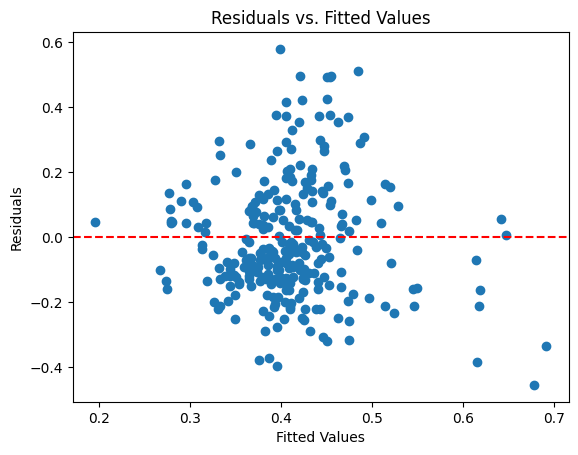

Fold Metrics: 1
  Train MSE: 0.012912967321568979
  Test MSE: 0.011483167709783314
  Train R2: 0.6144779596069438
  Test R2: 0.6128345428354703
Fold Metrics: 2
  Train MSE: 0.01283097596156713
  Test MSE: 0.01184132476079434
  Train R2: 0.611351104103772
  Test R2: 0.6251653946274202
Fold Metrics: 3
  Train MSE: 0.012492008995148206
  Test MSE: 0.013141328666580977
  Train R2: 0.6238205571887494
  Test R2: 0.573055248791347
Fold Metrics: 4
  Train MSE: 0.012259811570223815
  Test MSE: 0.014185731459896291
  Train R2: 0.6143389531233874
  Test R2: 0.6047284723622126
Fold Metrics: 5
  Train MSE: 0.0120798788622061
  Test MSE: 0.014835265842902694
  Train R2: 0.6239033877192581
  Test R2: 0.5757392873791525
Model 5 Coefficients: [ 4.07287058e-01  1.29953958e-01 -3.19938912e+11 -3.19938912e+11
 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09
 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09
 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09 -3.65180078e+09
 -3.

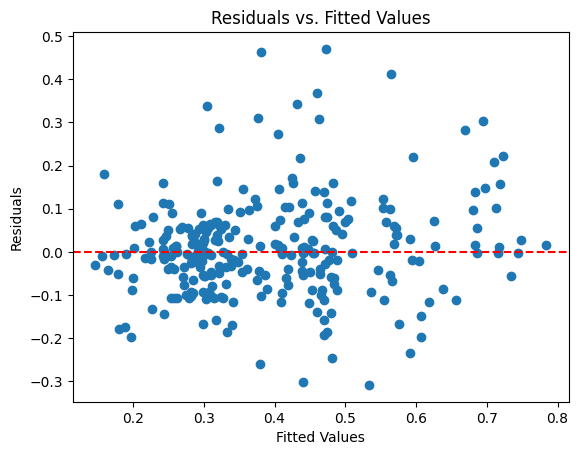

Fold Metrics: 1
  Train MSE: 0.008788950928326975
  Test MSE: 0.008014015344253337
  Train R2: 0.7376021939478303
  Test R2: 0.7298001742291067
Fold Metrics: 2
  Train MSE: 0.008577311256904288
  Test MSE: 0.00892650904181745
  Train R2: 0.7401941551648741
  Test R2: 0.7174332634535432
Fold Metrics: 3
  Train MSE: 0.008783964107800874
  Test MSE: 0.007988428114306716
  Train R2: 0.7354831616731994
  Test R2: 0.7404663150626274
Fold Metrics: 4
  Train MSE: 0.00829218646283729
  Test MSE: 0.010286110344759918
  Train R2: 0.7391498805804628
  Test R2: 0.7133875992987515
Fold Metrics: 5
  Train MSE: 0.008267603811810317
  Test MSE: 0.010102848695737505
  Train R2: 0.7425952842102137
  Test R2: 0.7110775207843839
Model 6 Coefficients: [ 3.17544763e-01  2.08571009e-01  4.26910592e-01  3.50291108e-01
  1.35781921e+12  1.35781921e+12 -1.42856419e+11 -1.42856419e+11
 -1.42856419e+11 -1.42856419e+11 -1.42856419e+11 -1.42856419e+11
 -1.42856419e+11 -1.42856419e+11 -1.42856419e+11 -1.42856419e+11


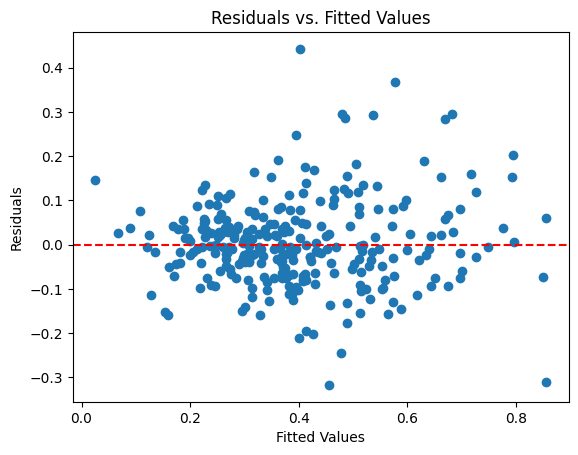

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#############################################################################################################
# Model 4
features4 = ['LotArea', 'Street']
X4 = train_df[features4]
y = train_df['SalePrice']

# One-hot encode categorical features, handling unknown categories
encoder4 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X4_encoded = encoder4.fit_transform(X4[['Street']])
X4_encoded_df = pd.DataFrame(X4_encoded, columns=encoder4.get_feature_names_out(['Street']))

# Align indices before concatenating
X4_encoded_df.index = X4.index

X4_final = pd.concat([X4[['LotArea']], X4_encoded_df], axis=1) # Concatenate 'LotArea' and encoded 'Street'
X_train4, X_test4, y_train, y_test = train_test_split(X4_final, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model4 = train(X_train4, y_train, kf)
print("Model 4 Coefficients:", model4.coef_)

# Predict on test set and calculate metrics
y_pred4 = model4.predict(X_test4)
mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
print("Model 4 MSE:", mse4)
print("Model 4 R2 Score:", r2_4)
model_scores.append({'Model': "model4", 'MSE': mse4, 'R2 Score': r2_4})

#residual plot
print("\n\nResidual Plot for Model 4\n\n")
residual_plot(X_test4, y_test, model4)

#############################################################################################################
# Model 5
features5 = ['LotArea', 'OverallCond', 'Street', 'Neighborhood']
X5 = train_df[features5]

# One-hot encode categorical features
encoder5 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X5_encoded = encoder5.fit_transform(X5.select_dtypes(include=['object']))
X5_encoded_df = pd.DataFrame(X5_encoded, columns=encoder5.get_feature_names_out(X5.select_dtypes(include=['object']).columns))

# Align indices before concatenating
X5_encoded_df.index = X5.index
X5_final = pd.concat([X5.select_dtypes(exclude=['object']), X5_encoded_df], axis=1)

X_train5, X_test5, _, _ = train_test_split(X5_final, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model5 = train(X_train5, y_train, kf)
print("Model 5 Coefficients:", model5.coef_)

# Predict on test set and calculate metrics
y_pred5 = model5.predict(X_test5)
mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)
print("Model 5 MSE:", mse5)
print("Model 5 R2 Score:", r2_5)

model_scores.append({'Model': "model5", 'MSE': mse5, 'R2 Score': r2_5})

#residual plot
print("\n\nResidual Plot for Model 5\n\n")
residual_plot(X_test5, y_test, model5)


#############################################################################################################
# Model 6
features6 = ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']
X6 = train_df[features6]

# One-hot encode categorical features
encoder6 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X6_encoded = encoder6.fit_transform(X6.select_dtypes(include=['object']))
X6_encoded_df = pd.DataFrame(X6_encoded, columns=encoder6.get_feature_names_out(X6.select_dtypes(include=['object']).columns))

# Align indices before concatenating
X6_encoded_df.index = X6.index

X6_final = pd.concat([X6.select_dtypes(exclude=['object']), X6_encoded_df], axis=1)

X_train6, X_test6, _, _ = train_test_split(X6_final, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
model6 = train(X_train6, y_train, kf)
print("Model 6 Coefficients:", model6.coef_)

# Predict on test set and calculate metrics
y_pred6 = model6.predict(X_test6)
mse6 = mean_squared_error(y_test, y_pred6)
r2_6 = r2_score(y_test, y_pred6)
print("Model 6 MSE:", mse6)
print("Model 6 R2 Score:", r2_6)

model_scores.append({'Model': "model6", 'MSE': mse6, 'R2 Score': r2_6})

#residual plot
print("\n\nResidual Plot for Model 6\n\n")
residual_plot(X_test6, y_test, model6)


In [23]:
df_scores = pd.DataFrame(model_scores)

# Print the table
print(df_scores)

best_model = df_scores.loc[df_scores['MSE'].idxmin()]
print("********************************************************")
print("Best Model:")
print(best_model)

    Model       MSE  R2 Score
0  model1  0.032353  0.123412
1  model2  0.010677  0.710699
2  model3  0.007343  0.801040
3  model4  0.033402  0.094991
4  model5  0.013248  0.641052
5  model6  0.009913  0.731415
********************************************************
Best Model:
Model         model3
MSE         0.007343
R2 Score     0.80104
Name: 2, dtype: object


##Compare the feature “LotArea” weights/coefficients for all the six trained models and plot a graph using the Matplotlib library.

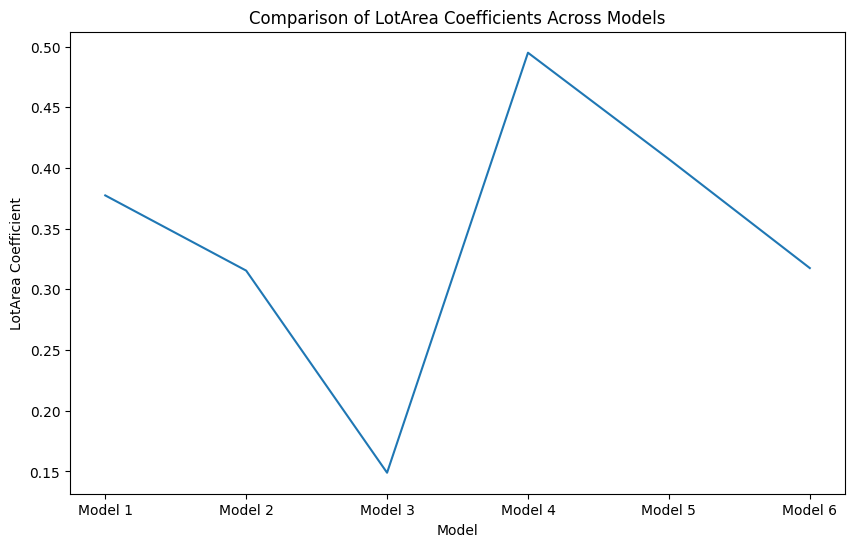

In [24]:
import matplotlib.pyplot as plt

# Extract LotArea coefficients
lot_area_coeffs = []
for i in range(1, 7):
    model = globals()[f"model{i}"]  # Get the model from the global namespace
    try:
        # Find the index of the 'LotArea' feature (assuming it's present in all models)
        lot_area_index = list(model.feature_names_in_).index('LotArea')
        coeff = model.coef_[lot_area_index]
    except (ValueError, AttributeError):  # Handle cases where 'LotArea' or coef_ might not exist
        coeff = None
    lot_area_coeffs.append(coeff)

# Plot the coefficients
model_names = [f"Model {i}" for i in range(1, 7)]
plt.figure(figsize=(10, 6))
plt.plot(model_names, lot_area_coeffs)
plt.xlabel("Model")
plt.ylabel("LotArea Coefficient")
plt.title("Comparison of LotArea Coefficients Across Models")
plt.show()

******************************************************
Degree 2 Coefficients: [ 0.          0.86776249 -0.51363274]
Model Poly_2 MSE: 0.03265501002883291
Model Poly_2 R2 Score: 0.11522395136925934
******************************************************
Degree 3 Coefficients: [ 0.          0.12720707  1.7989382  -1.88374015]
Model Poly_3 MSE: 0.0320691886798078
Model Poly_3 R2 Score: 0.13109657544551334


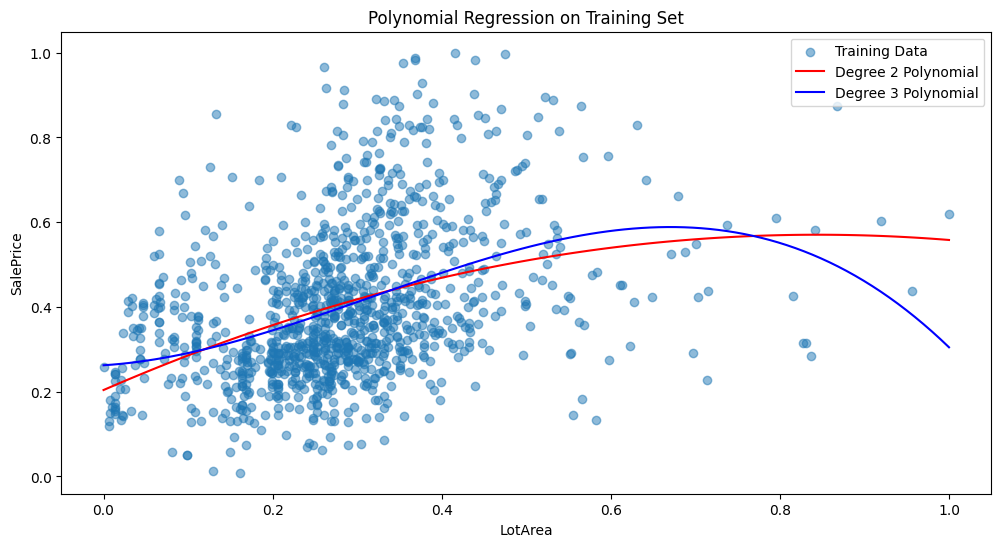

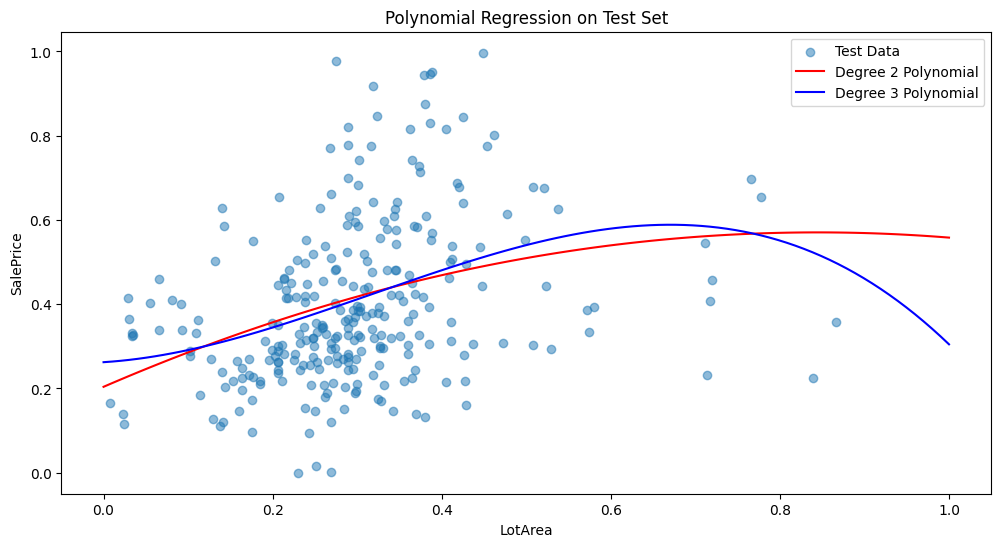

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Extract features and target
X = train_df[['LotArea']]
y = train_df['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("******************************************************")

# Polynomial Regression - Degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_train_poly_2, y_train)
print("Degree 2 Coefficients:", model_poly_2.coef_)

# Predict on test set and calculate metrics
X_test_poly2 = poly_features_2.transform(X_test)
y_pred = model_poly_2.predict(X_test_poly2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Poly_2 MSE:", mse)
print("Model Poly_2 R2 Score:", r2)

print("******************************************************")

# Polynomial Regression - Degree 3
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
model_poly_3 = LinearRegression()
model_poly_3.fit(X_train_poly_3, y_train)
print("Degree 3 Coefficients:", model_poly_3.coef_)

# Predict on test set and calculate metrics
X_test_poly3 = poly_features_3.transform(X_test)
y_pred = model_poly_3.predict(X_test_poly3)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Poly_3 MSE:", mse)
print("Model Poly_3 R2 Score:", r2)

# Bonus: Plot on training and test sets
# Generate points for plotting the curves
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_df = pd.DataFrame(X_plot, columns=['LotArea'])

# Degree 2 predictions
X_plot_poly_2 = poly_features_2.transform(X_plot_df)
y_plot_poly_2 = model_poly_2.predict(X_plot_poly_2)

# Degree 3 predictions
X_plot_poly_3 = poly_features_3.transform(X_plot_df)
y_plot_poly_3 = model_poly_3.predict(X_plot_poly_3)

# Plot training data and models
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.plot(X_plot, y_plot_poly_2, color='red', label='Degree 2 Polynomial')
plt.plot(X_plot, y_plot_poly_3, color='blue', label='Degree 3 Polynomial')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Polynomial Regression on Training Set')
plt.legend()
plt.show()

# Plot test data and models
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)
plt.plot(X_plot, y_plot_poly_2, color='red', label='Degree 2 Polynomial')
plt.plot(X_plot, y_plot_poly_3, color='blue', label='Degree 3 Polynomial')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Polynomial Regression on Test Set')
plt.legend()
plt.show()